# Surveying my options of human ECoG datasets for timescale
Mostly checking for wide coverage with easy tasks & clear behavioral events/epoching. The pipeline for all the datasets should be similar, given time series and some event marking.

Compute some example PSDs to see if anything funky is going on:
- whole recording
- pre/post task epoched average

In [99]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import io
import os

# Kahana datasets

### Merkow et al, 2015

Notes:
- so I did all the organization and sorting back when for the EI project, not really sure what the difference is between raw and remontaged data, and there's no README file ffs.
- some of the unepoched PSDs definitely look f-ed up, could be a noise issue

In [49]:
basepath = '/Users/rdgao/Documents/data/Kahana/MerkKaha15-selected/'
sublocs = io.loadmat(basepath+'data_unpacked/results/subIndLoc.mat', squeeze_me=True)
#psds = io.loadmat(basepath+'data_unpacked/results/PSD05Hz.mat', squeeze_me=True)
psds = io.loadmat(basepath+'remon/results/PSD_epoch_prestim.mat', squeeze_me=True) # epoched
print(sublocs.keys())
print(psds.keys())

psds = io.loadmat(basepath+'remon/results/PSD_epoch_prestim.mat', squeeze_me=True)

dict_keys(['__header__', '__version__', '__globals__', 'subInd', 'coor', 'subj_lab', 'coor_all', 'mont_type'])
dict_keys(['__header__', '__version__', '__globals__', 'PSD_trial', 'PSD', 'subj', 'coor', 'FS', 'recLen', 'loc_all', 'mont_type', 'e_type', 'badPSD'])


In [92]:
psds['badPSD'].shape

(39,)

In [95]:
psds['PSD_trial'][0].shape

(201, 120, 35)

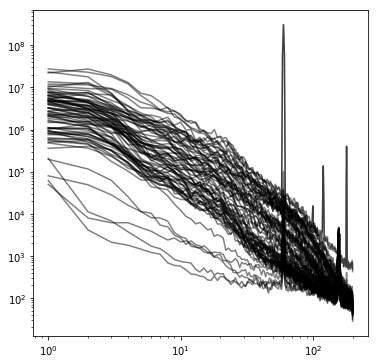

In [98]:
sesh=20
psds['badPSD'][sesh]==0
psds['FS'][sesh]

plt.figure(figsize=(6,6))
plt.loglog(psds['PSD'][sesh][:,psds['badPSD'][sesh]==0], 'k', alpha=0.5);

### Ramaya et al., 2015
http://memory.psych.upenn.edu/files/pubs/RamaEtal15.pdf
- very nice broad coverage map
- Ashwin included all the code for preprocessing & aggregating stuff
- need to check data quality

In [111]:
# check overlap between Ramaya & Merkow datasets
subjs_merk = np.sort([s[:5] for s in os.listdir('/Users/rdgao/Documents/data/Kahana/MerkKaha15-selected/data_unpacked/') if '.mat' in s])
subjs_rama = np.sort([s[:5] for s in os.listdir('/Users/rdgao/Documents/data/Kahana/RamaEtal15-selected/data_unpacked/') if '.mat' in s])
print(np.unique(subjs_merk))
print(np.unique(subjs_rama))

['TJ011' 'TJ015' 'TJ019' 'TJ020' 'TJ021' 'TJ022' 'TJ025' 'TJ028' 'TJ073'
 'UP011' 'UP017' 'UP019' 'UP021' 'UP034' 'UP041' 'UP042' 'UP043']
['TJ045' 'TJ069' 'TJ070' 'TJ071' 'TJ073' 'TJ074' 'TJ075' 'TJ076' 'TJ077'
 'UP032' 'UP033' 'UP034' 'UP036' 'UP037' 'UP038' 'UP039' 'UP040' 'UP041'
 'UP043']


# KJM datasets

# Hermes dataset

# MNI rest data
Frauscher et al., 2018.
- super conveniently labeled, can push this out in under 2 hours probably
- only 1 minute of eyes closed data though
- will still need to manipulate the tables though

In [ ]:
basepath = '/Users/rdgao/Documents/data/MNI_rest/WakefulnessMatlabFile.mat'

# order of trying:
1. MNI
2. Kai + Dora
    - 10k sampling dataset
3. Kahana
    - Merkow
    - Ramaya